HW1 // Se

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("usjobs.csv" , index_col =0)
data.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [2]:
count_missing = data.isnull().sum()
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing , 'count_missing' : count_missing})
missing_value_df


,percent_missing,count_missing
Job Title,0.000000,0
Salary Estimate,0.044385,1
Job Description,0.000000,0
Rating,0.000000,0
Company Name,0.044385,1
Location,0.000000,0
Headquarters,7.634265,172
Size,7.234798,163
Founded,29.294274,660
Type of ownership,7.234798,163


In [3]:
data = data.dropna(thresh=int(data.shape[0] * .5), axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2252
Data columns (total 13 columns):
Job Title            2253 non-null object
Salary Estimate      2252 non-null object
Job Description      2253 non-null object
Rating               2253 non-null float64
Company Name         2252 non-null object
Location             2253 non-null object
Headquarters         2081 non-null object
Size                 2090 non-null object
Founded              1593 non-null float64
Type of ownership    2090 non-null object
Industry             1900 non-null object
Sector               1900 non-null object
Revenue              2090 non-null object
dtypes: float64(2), object(11)
memory usage: 246.4+ KB


In [4]:
#one_data = data.isnull().sum() == 1
cleaned = data[(data['Salary Estimate'].notnull()) & data['Company Name'].notnull()]
cleaned.isnull().sum()
cleaned.shape

(2251, 13)

In [5]:
cleaned = cleaned.reset_index(drop = True)

salaries = cleaned['Salary Estimate'].str.split(expand = True)[0]
cleaned['Min Salary'] = salaries.str.split("-" , expand = True)[0].str[1:]
cleaned['Max Salary'] = salaries.str.split("-",expand = True)[1].str[1:]
cleaned['Mean Salary'] = ((pd.to_numeric(cleaned['Min Salary'].str[:-1]) + pd.to_numeric(cleaned['Max Salary'].str[:-1]))/2) * 1000
#del cleaned['Salary Estimate'] #if we want to drop the column
cleaned

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min Salary,Max Salary,Mean Salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),37K,66K,51500.0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37K,66K,51500.0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,37K,66K,51500.0
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),37K,66K,51500.0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37K,66K,51500.0
5,Data Analyst,$37K-$66K (Glassdoor est.),About Cubist\nCubist Systematic Strategies is ...,3.9,Point72\n3.9,"New York, NY","Stamford, CT",1001 to 5000 employees,2014.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,37K,66K,51500.0
6,Business/Data Analyst (FP&A),$37K-$66K (Glassdoor est.),Two Sigma is a different kind of investment ma...,4.4,Two Sigma\n4.4,"New York, NY","New York, NY",1001 to 5000 employees,2001.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,37K,66K,51500.0
7,Data Science Analyst,$37K-$66K (Glassdoor est.),Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914.0,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),37K,66K,51500.0
8,Data Analyst,$37K-$66K (Glassdoor est.),The Data Analyst is an integral member of the ...,4.0,DMGT\n4.0,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896.0,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),37K,66K,51500.0
9,"Data Analyst, Merchant Health",$37K-$66K (Glassdoor est.),About Us\n\nRiskified is the AI platform power...,4.4,Riskified\n4.4,"New York, NY","New York, NY",501 to 1000 employees,2013.0,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,37K,66K,51500.0


In [6]:
cleaned.sort_values(by = ['Mean Salary'] , inplace = True)
cleaned = cleaned[int((5 * len(cleaned)) / 100) : -int((5 * len(cleaned)) / 100)]
cleaned = cleaned.reset_index(drop = True)
cleaned['Mean Salary'].describe()

count      2027.000000
mean      70674.888999
std       17989.532328
min       38500.000000
25%       59000.000000
50%       69000.000000
75%       80000.000000
max      120000.000000
Name: Mean Salary, dtype: float64

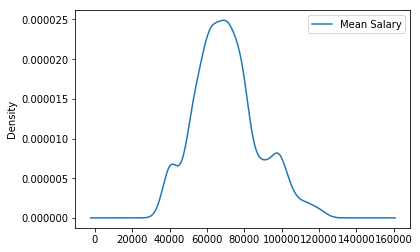

In [7]:
company_sal_av = cleaned[['Company Name', 'Mean Salary']].groupby('Company Name').mean()

company_sal_av.plot.kde()


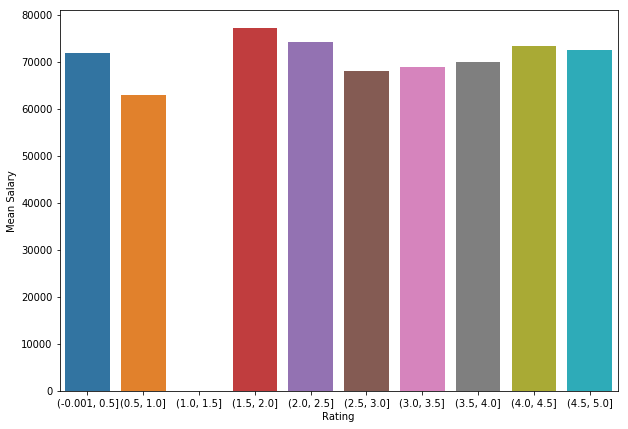

In [8]:
company_sal_av["Rating"] = cleaned.groupby("Company Name")["Rating"].mean()
company_sal_av["Rating"] = pd.cut(company_sal_av["Rating"], np.arange(0, 5.0001, 0.5), include_lowest=True)
company_sal_Rate = company_sal_av.groupby("Rating").mean()[["Mean Salary"]]
plt.figure(figsize=(10 , 7))
sns.barplot(company_sal_Rate.index, company_sal_Rate["Mean Salary"]);



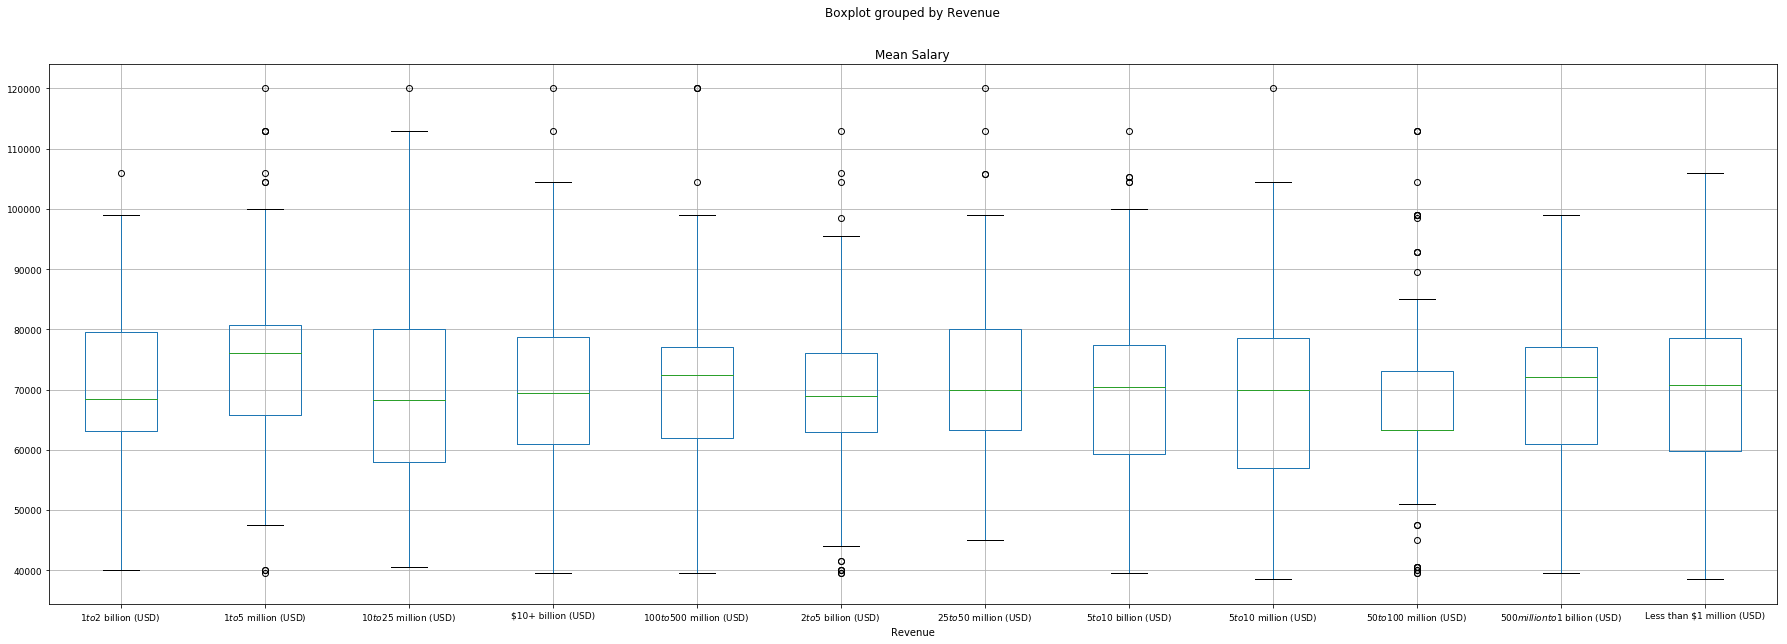

In [9]:
company_rev = pd.merge(cleaned[["Revenue" , "Company Name"]] , company_sal_av , on = "Company Name")
company_rev.replace("Unknown / Non-Applicable" , np.nan , inplace = True)
company_rev = company_rev[company_rev["Revenue"].notnull()]
company_rev.boxplot(column = ['Mean Salary'] , by = 'Revenue' , figsize = (30 , 10) , fontsize = 9)


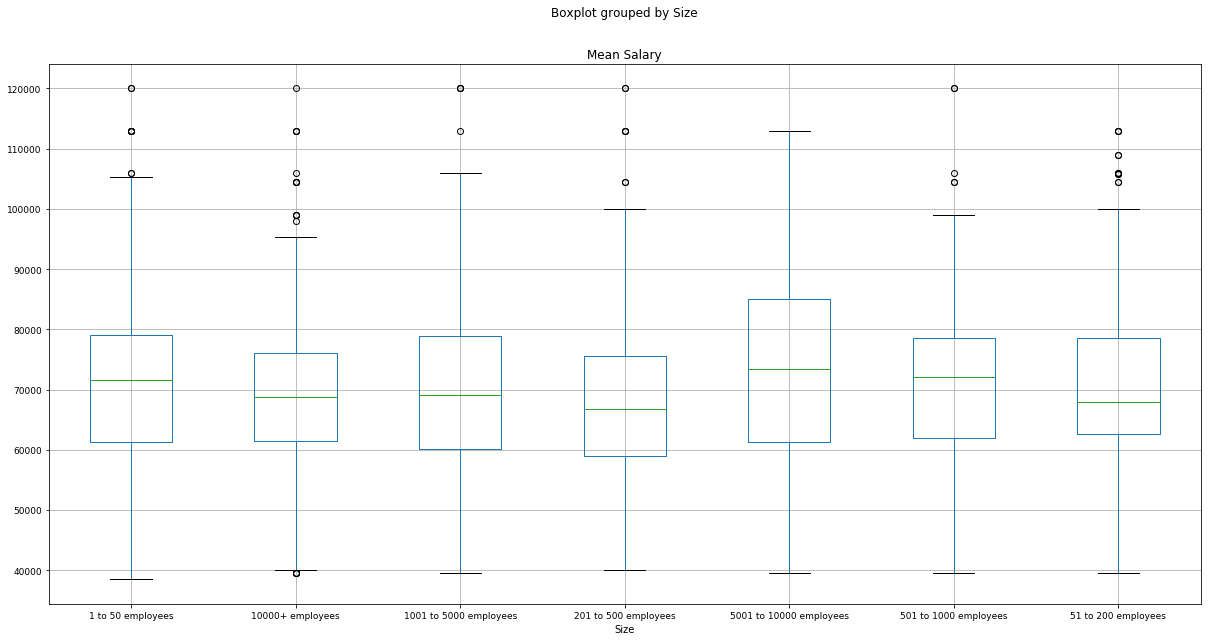

In [10]:
company_size = pd.merge(cleaned[["Size" , "Company Name"]] , company_sal_av , on = "Company Name")
company_size.replace("Unknown" , np.nan , inplace = True)
company_size = company_size[company_size["Size"].notnull()]
company_size.boxplot(column = ['Mean Salary'] , by = 'Size' , figsize = (20 , 10) , fontsize = 9)

In [11]:

company_ratings = pd.DataFrame()
company_ratings = cleaned[["Rating", "Mean Salary"]]
company_size['Size'] = company_size['Size'].astype("category").cat.codes
company_rev["Revenue"] = company_rev["Revenue"].astype("category").cat.codes
print(company_size.corr())
print(company_rev.corr())
print(company_ratings.corr())


                 Size  Mean Salary
Size         1.000000     0.000225
Mean Salary  0.000225     1.000000
              Revenue  Mean Salary
Revenue      1.000000    -0.071174
Mean Salary -0.071174     1.000000
               Rating  Mean Salary
Rating       1.000000    -0.014882
Mean Salary -0.014882     1.000000


In [12]:
second = pd.read_csv('uscities.csv')
second.head(5)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220.0,10715.0,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807.0,3276.0,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203.0,4574.0,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545.0,5019.0,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938.0,1526.0,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [13]:
loc_data = pd.DataFrame()
loc_data['Location'] = second['city'] + ', ' + second['state_id']
loc_data['lat'] , loc_data['lng'] = second['lat'] , second['lng']
loc_data.drop_duplicates('Location' , inplace = True)
loc_data.head()

,Location,lat,lng
0,"New York, NY",40.6943,-73.9249
1,"Los Angeles, CA",34.1139,-118.4068
2,"Chicago, IL",41.8373,-87.6862
3,"Miami, FL",25.7839,-80.2102
4,"Dallas, TX",32.7936,-96.7662


In [14]:
cleaned = pd.merge(cleaned , loc_data , on = 'Location')
cleaned.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min Salary,Max Salary,Mean Salary,lat,lng
0,Industry Analyst -- Data Science and Strategy,$35K-$42K (Glassdoor est.),We are hiring an Industry Analyst for the Data...,3.5,GasPedal\n3.5,"Austin, TX","Austin, TX",1 to 50 employees,2007.0,Company - Private,Membership Organizations,Business Services,$5 to $10 million (USD),35K,42K,38500.0,30.3004,-97.7522
1,Leading Data-Driven Change -- Data Industry An...,$35K-$42K (Glassdoor est.),"Lots of people talk about ""making the world a ...",3.5,GasPedal\n3.5,"Austin, TX","Austin, TX",1 to 50 employees,2007.0,Company - Private,Membership Organizations,Business Services,$5 to $10 million (USD),35K,42K,38500.0,30.3004,-97.7522
2,Operations Research Analyst (Data Scientist),$35K-$42K (Glassdoor est.),About the Position: This position serves as a ...,0.0,United States Army Futures Command,"Austin, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,35K,42K,38500.0,30.3004,-97.7522
3,Senior Data Analyst,$35K-$42K (Glassdoor est.),Job Description\n\nThe Senior Data Analyst is ...,0.0,Iris Plans Inc.,"Austin, TX","Austin, TX",1 to 50 employees,NaN,Company - Private,NaN,NaN,Unknown / Non-Applicable,35K,42K,38500.0,30.3004,-97.7522
4,Junior Data Analyst,$42K-$76K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","Austin, TX","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),42K,76K,59000.0,30.3004,-97.7522


For This Part Try : File -> Trust Notebook

In [15]:
import folium
jobs_loc = folium.Map(min_zoom = 2)
cleaned.apply(lambda x: folium.CircleMarker( location=[x["lat"], x["lng"]], weight=10 , radius = 3 ).add_to(jobs_loc), axis= 1 )
jobs_loc
